In [14]:
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import json
import gzip
import random
import math
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
from rake_nltk import Rake

In [2]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [3]:
df = getDF('meta_Luxury_Beauty.json.gz')

In [4]:
df.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,,,B0000531EN
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],[https://images-na.ssl-images-amazon.com/image...,,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,,,B0000532JH
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],[https://images-na.ssl-images-amazon.com/image...,,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,,$15.99,B00005A77F
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,,$18.00,B00005NDTD


In [5]:
#remove NaN from description
df.loc[df['description'].isna(),'description']=""
#remove NaN from title
df.loc[df['title'].isna(),'title']=""
#remove NaN from price
df.loc[df['price'].isna(),'price']=""



In [6]:
df['description'] = df['description'].fillna('').apply(str)
df['description'] = df['description'].astype('|S')
df['description'] = df['description'].apply(str)

In [7]:
df['title'] = df['title'].fillna('').apply(str)
df['title'] = df['title'].astype('|S')
df['title'] = df['title'].apply(str)

In [8]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(' ', '')

In [9]:
def rake_implement(x):
    r = Rake(min_length=1, max_length=6)
    r.extract_keywords_from_text(x) # r.extract_keywords_from_text(<text to process>)
    keywords = r.get_ranked_phrases() # To get keyword phrases ranked highest to lowest.
    return keywords[:10]

In [ ]:
df['key_desc']=df['description'].apply(lambda x: rake_implement(x))
df['key_title']=df['title'].apply(lambda x: rake_implement(x))
df[["asin","key_desc","key_title","price"]].to_csv("beauty_meta_text.csv")

In [4]:
df = pd.read_csv("beauty_meta_text.csv")
df=df.drop(df.columns[0], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12299 entries, 0 to 12298
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   asin       12299 non-null  object
 1   key_desc   12299 non-null  object
 2   key_title  12299 non-null  object
 3   price      7039 non-null   object
dtypes: object(4)
memory usage: 384.5+ KB


In [5]:
# Vectorize key words 
from sklearn.feature_extraction.text import TfidfVectorizer #countvectorizer
vectorizer = CountVectorizer()
tfidf = TfidfVectorizer() 
title_vect = tfidf.fit_transform(df['key_title'])
title_txt2 = pd.DataFrame(title_vect.toarray(), columns = tfidf.get_feature_names())

In [6]:
# Remove numeric "words"
title_txt2=title_txt2.filter(regex='^\D')

In [7]:
title_txt2

,ab,abba,abcderm,abdomen,abrasion,abricot,absence,absinth,absolu,absolue,...,zp643,zp688,zp704,zp706,zp709,zp747,zsa,zuza,zwilling,zyme
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_title=cosine_similarity(title_txt2, title_txt2)


# Clustering

In [9]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import TruncatedSVD

In [16]:
#SVD

n_comp = [4,10,15,20,50,100,150,200,500,700,800,900,1000,1500] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(review_txt2)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))

Number of components = 4 and explained variance = 0.0663574611097549
Number of components = 10 and explained variance = 0.10148142084382139
Number of components = 15 and explained variance = 0.12315809276817202
Number of components = 20 and explained variance = 0.14109258622547272
Number of components = 50 and explained variance = 0.22421130189675884
Number of components = 100 and explained variance = 0.31546084769245786
Number of components = 150 and explained variance = 0.3826693384493991
Number of components = 200 and explained variance = 0.43804027787921296
Number of components = 500 and explained variance = 0.6383361283345172
Number of components = 700 and explained variance = 0.7113530233313835
Number of components = 800 and explained variance = 0.7390572996983893
Number of components = 900 and explained variance = 0.762879386594066
Number of components = 1000 and explained variance = 0.7836810400156007
Number of components = 1500 and explained variance = 0.8569056878884294


In [10]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=1500)
title_svd=svd.fit(title_txt2).transform(title_txt2)
pd.DataFrame(title_svd)

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.086584,0.045501,0.146269,0.112707,0.232905,0.233405,0.207311,-0.076867,0.028376,0.009964,...,0.005847,-0.002548,-0.017654,-0.007325,-0.008807,-0.007742,-0.006645,0.009176,-0.002840,0.000515
1,0.009924,-0.002627,0.041085,0.026067,0.069450,0.006004,-0.002497,-0.019125,-0.019604,-0.001733,...,-0.000504,-0.006207,0.001314,-0.006115,-0.001052,0.005611,0.002708,0.001533,0.002644,-0.002912
2,0.102718,0.065178,0.063449,0.004484,0.048609,-0.025190,-0.040068,-0.008248,-0.022361,-0.013078,...,0.002041,0.004844,0.000904,0.003937,0.000006,-0.002386,0.000449,-0.001078,-0.001866,-0.002843
3,0.205183,-0.051889,0.160610,0.126629,0.284304,0.295098,0.256868,-0.109476,0.022597,0.012348,...,-0.007362,0.000467,-0.016090,-0.009738,-0.006149,0.009438,-0.002241,-0.007665,-0.008625,0.011353
4,0.008251,-0.001125,0.040265,0.022529,0.068367,0.014437,-0.002128,-0.028716,-0.057221,-0.008947,...,-0.020059,0.032966,-0.009558,-0.026111,-0.013088,-0.000467,0.000850,0.012325,-0.035654,0.006351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,0.002818,-0.003733,0.075295,-0.062172,-0.037166,0.079195,-0.051292,0.000490,-0.003661,-0.067041,...,0.005081,0.001457,-0.006213,0.002910,-0.008559,-0.002897,0.003899,0.008609,-0.000040,-0.006497
12295,0.002916,-0.003835,0.077938,-0.063990,-0.037766,0.081359,-0.053461,0.000303,-0.002168,-0.069131,...,0.017949,-0.008893,0.039981,0.019045,0.027766,-0.011502,0.021154,-0.016537,-0.012326,0.019461
12296,0.001534,-0.000660,0.011768,-0.005932,0.000046,0.014528,-0.005907,0.001290,-0.002199,-0.010388,...,-0.014579,0.012910,-0.001512,0.004232,-0.007777,-0.001487,-0.000580,-0.001143,-0.001006,0.003787
12297,0.120654,-0.038275,0.011552,0.020932,-0.023474,-0.006538,0.003694,-0.003134,-0.000551,0.006061,...,-0.001195,-0.002538,0.002561,0.002979,0.004728,-0.000679,0.005643,0.004377,0.002895,-0.000735


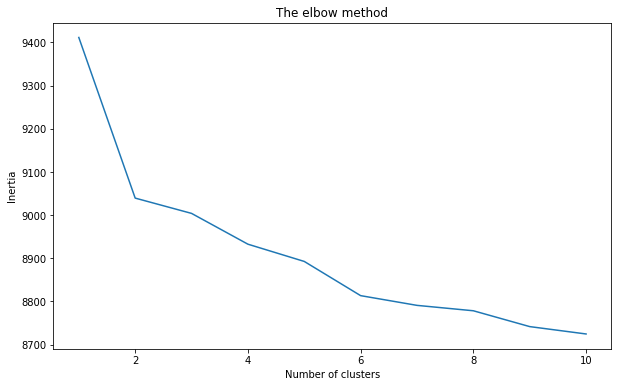

In [21]:
#KMeans 
#Plot intertia to determine optimal number of clusters

def plot_inertia(array, start=1, end=10):

    inertia = []
    x_axis = range(start,end+1)

    for i in x_axis:
        kmeans = KMeans(n_clusters = i, random_state = 0)
        kmeans.fit(array)
        inertia.append(kmeans.inertia_)
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, inertia)

    return ax

plot_inertia(title_svd)

In [30]:
# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(title_svd)
klabels=kmeans.predict(title_svd)

In [31]:
np.unique(klabels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([ 190,  868, 2996, 7357,  337,  551], dtype=int64))

In [29]:
# Look at results
meta_df = getDF('meta_Luxury_Beauty.json.gz')
cluster_df = pd.DataFrame({'label': klabels, 'item': meta_df['title']})

NameError: name 'klabels' is not defined

In [37]:
# Display df sorted by cluster label
print(cluster_df.sort_values('label'))
cluster_df.to_csv("product_clusters.csv")

       label                                               item
0          0  Crabtree &amp; Evelyn - Gardener's Ultra-Moist...
8365       0  Crabtree &amp; Evelyn Ultra-Moisturising Hand ...
8482       0  Crabtree &amp; Evelyn 60-Second Fix for Hands,...
8484       0  Crabtree &amp; Evelyn Hand Therapy Sampler, Pa...
8485       0  Crabtree &amp; Evelyn 60-Second Fix for Hands,...
...      ...                                                ...
11501      5  Vince Camuto Homme Eau de Toilette Spray,  6.7...
8004       5  Glo Skin Beauty Therapeutics Gentle Eye Makeup...
11509      5  ColorProof Color Care Authority Signature Blon...
876        5  RUSK Designer Collection Wired Flexible Stylin...
4514       5  Jan Marini Skin Research Age Intervention Reti...

[12299 rows x 2 columns]


In [ ]:
#Heirarchical clustering

from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
plt.title("Product Dendrogram: Ward")

mergings = linkage(cos_title, method='ward')

dendrogram(mergings,leaf_rotation=90,leaf_font_size=8)

plt.show()
#print(labels)

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(title_svd)

array([2, 0, 0, ..., 3, 3, 3], dtype=int64)

In [22]:
cluster.labels_

array([2, 0, 0, ..., 3, 3, 3], dtype=int64)

In [30]:
heir_cluster_df = pd.DataFrame({'label': cluster.labels_, 'item': meta_df['title']})

In [34]:
print(heir_cluster_df)

       label                                               item
0          2  Crabtree &amp; Evelyn - Gardener's Ultra-Moist...
1          0                                   AHAVA Bath Salts
2          0      AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4
3          2  Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...
4          0                                 Soy Milk Hand Crme
...      ...                                                ...
12294      3            CND Shellac Power Polish, Patina Buckle
12295      3               CND Shellac power polish denim patch
12296      3                       CND Shellac, Leather Satchel
12297      3  Juicy Couture I Love Juicy Couture, 1.7 fl. Oz...
12298      3  Juicy Couture I Love Juicy Couture, 3.4 fl. Oz...

[12299 rows x 2 columns]


In [15]:
title_sim=np.matrix(cos_title)

In [16]:
# Build a graph using from_numpy_matrix, which treats the similarity matrix as an adjacency matrix for the graph,
# meaning that the edges are weighted by their similarity to other customers. 

from matplotlib import cm
from matplotlib.pyplot import figure
import networkx as nx

G = nx.from_numpy_matrix(title_sim)

In [20]:
# Removed selfloops, as well as an outlier identified in earlier analysis 

G.remove_edges_from(nx.selfloop_edges(G))
remove = [node for node,degree in dict(G.degree()).items() if degree == 1]
G.remove_nodes_from(remove)

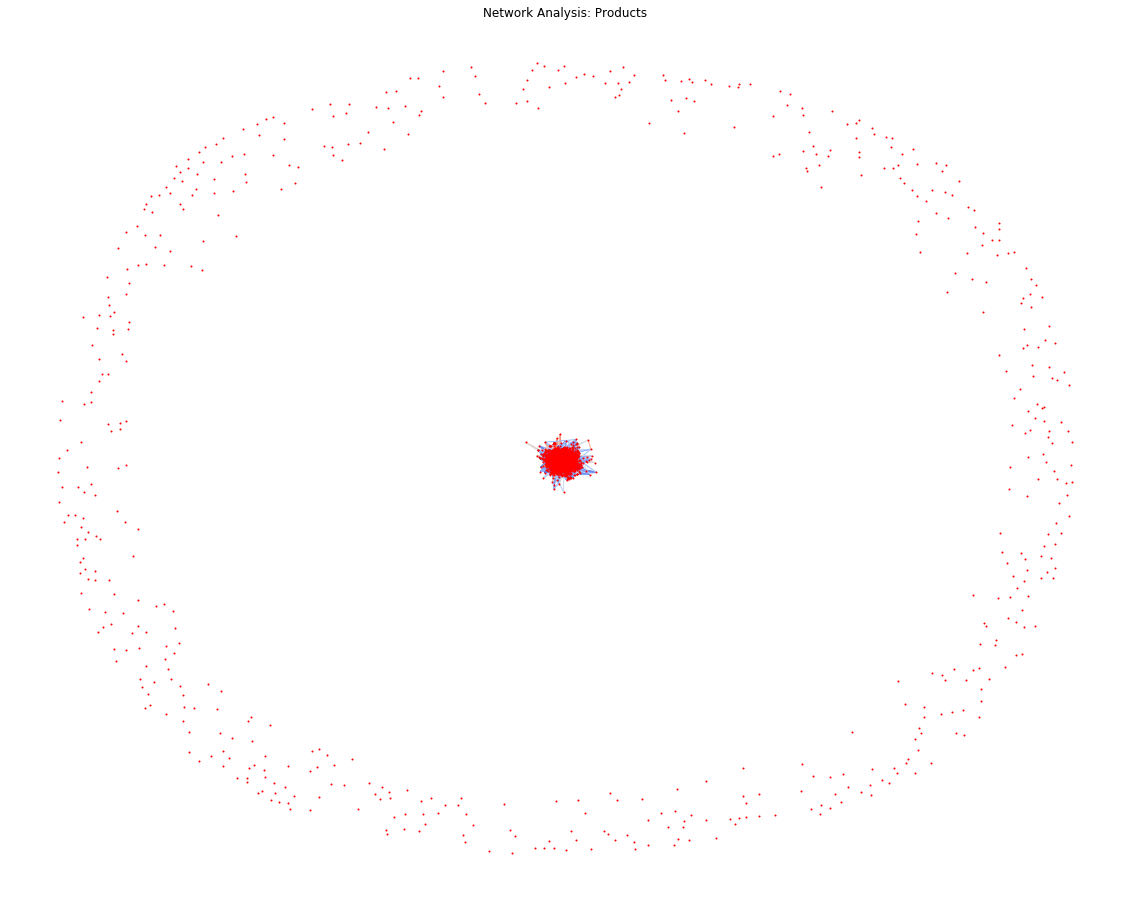

In [21]:

figure(figsize=(20, 16))
plt.title('Network Analysis: Products')
nx.draw(G,edge_color = [ i[2]['weight'] for i in G.edges(data=True) ], edge_cmap=cm.coolwarm ,node_size=1, node_color='red')

In [11]:
# TSNE
#Create function for TSNE 

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def tsne_fit(data, rate, perplexity, plot = True, return_ = False):
    model = TSNE(learning_rate=rate, perplexity = perplexity)
    transformed = model.fit_transform(data)
    xs = transformed[:,0]
    ys = transformed[:,1]
    if(plot):
        plt.scatter(xs,ys)
        plt.title("Learning Rate: {}, Perplexity: {}".format(rate,perplexity))
        plt.show()
    if return_ == True:
        return(xs,ys)

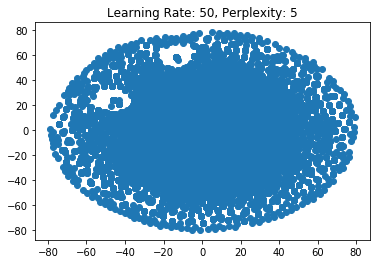

In [14]:
tsne_fit(title_txt2, 50, 5)